<a href="https://colab.research.google.com/github/Priyanshiguptaaa/CS5787-DeepLearning-Assignment1/blob/main/dl_ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting & Previewing data

In [1]:
import zipfile
import os

# Path to the uploaded .zip file (in Colab, it's usually in /content/)
zip_file_path = '/content/data-1.zip'

# Unzipping the data-1.zip file to a folder named 'unzipped_data'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/unzipped_data')

# Check the contents of the unzipped folder
os.listdir('/content/unzipped_data')

['__MACOSX', 'data']

In [2]:
import gzip
import shutil
import os

# Path to the folder where the .gz files are extracted
input_folder = '/content/unzipped_data/data'

# Iterate through each file in the input folder and unzip the .gz files
for filename in os.listdir(input_folder):
    if filename.endswith('.gz'):
        file_path = os.path.join(input_folder, filename)

        # Create output file path by removing the '.gz' extension
        output_file = file_path.replace('.gz', '')

        # Unzip the file
        with gzip.open(file_path, 'rb') as f_in:
            with open(output_file, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

        print(f'Unzipped: {filename} to {output_file}')

Unzipped: test-labels-idx1-ubyte.gz to /content/unzipped_data/data/test-labels-idx1-ubyte
Unzipped: test-images-idx3-ubyte.gz to /content/unzipped_data/data/test-images-idx3-ubyte
Unzipped: train-images-idx3-ubyte.gz to /content/unzipped_data/data/train-images-idx3-ubyte
Unzipped: train-labels-idx1-ubyte.gz to /content/unzipped_data/data/train-labels-idx1-ubyte


In [3]:
import numpy as np
import struct
import matplotlib.pyplot as plt

def read_idx(filename):
    """
    Reads an IDX file and returns the data as a numpy array.
    """
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

train_images_path = '/content/unzipped_data/data/train-images-idx3-ubyte'
train_labels_path = '/content/unzipped_data/data/train-labels-idx1-ubyte'
test_images_path = '/content/unzipped_data/data/test-images-idx3-ubyte'
test_labels_path = '/content/unzipped_data/data/test-labels-idx1-ubyte'

# Read train images and labels
train_images = read_idx(train_images_path)
train_labels = read_idx(train_labels_path)

# Read train images and labels
test_images = read_idx(test_images_path)
test_labels = read_idx(test_labels_path)

In [4]:
print(f"Train Images Shape: {train_images.shape}")
print(f"Train Labels Shape: {train_labels.shape}")
print(f"Test Images Shape: {test_images.shape}")
print(f"Train Labels Shape: {test_labels.shape}")

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Train Labels Shape: (10000,)


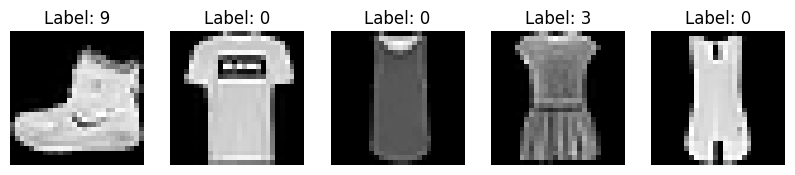

In [5]:
def preview_images(images, labels, num_images=5):
    """
    Preview the first num_images images from the dataset.
    """
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

# Preview the first 5 images from the training set
preview_images(train_images, train_labels, num_images=5)

# Preprocessing

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

train_images_tensor = torch.from_numpy(train_images).float()
train_labels_tensor = torch.from_numpy(train_labels).long()

test_images_tensor = torch.from_numpy(test_images).float()
test_labels_tensor = torch.from_numpy(test_labels).long()

<ipython-input-6-24f8923b8927>:5: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  train_images_tensor = torch.from_numpy(train_images).float()


In [7]:
# Reshape to add the channel dimension (1 channel for grayscale images)
train_images_tensor = train_images_tensor.unsqueeze(1)  # Result: (60000, 1, 28, 28)
test_images_tensor = test_images_tensor.unsqueeze(1)    # Result: (10000, 1, 28, 28)

In [8]:
# Normalize pixels
train_images_tensor /= 255.0
test_images_tensor /= 255.0

In [9]:
from torch.utils.data import DataLoader, TensorDataset

# Create PyTorch dataset from tensors
train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)

# Create DataLoader for training and test sets
train_loader = DataLoader(train_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

In [18]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Defining Lenet5 Architecture

In [62]:
class LeNet5(nn.Module):
    def __init__(self):
      super(LeNet5, self).__init__()
      self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
      self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
      self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
      self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
      self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1)
      self.fc1 = nn.Linear(in_features=120, out_features=84)
      self.fc2 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
      x = F.tanh(self.conv1(x))
      #x.shape = (batch_size,6,28,28)

      x = self.pool1(x)
      #x.shape = (batch_size,6,14,14)

      x = F.tanh(self.conv2(x))
      #x.shape = (batch_size,16,10,10)

      x = self.pool2(x)
      #x.shape = (batch_size,16,5,5)

      x = F.relu(self.conv3(x))
      #x.shape = (batch_size,120,1,1)

      x = x.view(-1, 120)
      x = F.relu(self.fc1(x))
      x = self.fc2(x) # apply softmax separately during training

      return x

In [69]:
class LeNet5Dropout(nn.Module):
    def __init__(self):
        super(LeNet5Dropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(in_features=120, out_features=84)
        self.fc2 = nn.Linear(in_features=84, out_features=10)
        self.dropout = nn.Dropout(p=0.3)

    def forward(self, x):
        x = F.tanh(self.conv1(x))
        x = self.pool1(x)
        x = F.tanh(self.conv2(x))
        x = self.pool2(x)
        x = F.tanh(self.conv3(x))
        x = x.view(-1, 120)
        x = F.tanh(self.fc1(x))
        x = self.dropout(x)  # Apply dropout before final layer
        x = self.fc2(x)
        return x

In [15]:
class LeNet5BatchNorm(nn.Module):
    def __init__(self):
        super(LeNet5BatchNorm, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(6)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1)
        self.bn3 = nn.BatchNorm2d(120)
        self.fc1 = nn.Linear(in_features=120, out_features=84)
        self.fc2 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = F.tanh(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = F.tanh(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = F.tanh(self.bn3(self.conv3(x)))
        x = x.view(-1, 120)
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

In [20]:
def train_model(model, optimizer, criterion, num_epochs=10, use_dropout=False):
    train_loss_history, train_acc_history = [], []
    test_acc_history = []

    model.to(device)

    for epoch in range(num_epochs):
        model.train()  # Enable dropout and batch normalization
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Accumulate loss
            running_loss += loss.item()

        # Check if we need to temporarily disable dropout for accuracy measurement
        if use_dropout:
            model.eval()  # Disable dropout

        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in train_loader:  # Measure accuracy on the training set
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        epoch_loss = running_loss / len(train_loader)
        train_loss_history.append(epoch_loss)
        train_acc_history.append(train_accuracy)

        # Switch back to training mode if dropout is being used
        if use_dropout:
            model.train()

        # Evaluate on the test set
        model.eval()  # Set model to evaluation mode
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracy = 100 * correct / total
        test_acc_history.append(test_accuracy)

        # Print statistics
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")

    return train_loss_history, train_acc_history, test_acc_history


Without Regularization

In [63]:
model_no_reg = LeNet5()
model_no_reg.to(device)
optimizer_no_reg = optim.Adam(model_no_reg.parameters(), lr=0.001)
train_loss_no_reg, train_acc_no_reg, test_acc_no_reg = train_model(model_no_reg, optimizer_no_reg, criterion, num_epochs=10, use_dropout=False)

Epoch [1/10], Loss: 0.6673, Train Accuracy: 82.32%, Test Accuracy: 81.12%
Epoch [2/10], Loss: 0.4249, Train Accuracy: 85.38%, Test Accuracy: 83.96%
Epoch [3/10], Loss: 0.3676, Train Accuracy: 86.81%, Test Accuracy: 85.17%
Epoch [4/10], Loss: 0.3355, Train Accuracy: 87.58%, Test Accuracy: 85.92%
Epoch [5/10], Loss: 0.3131, Train Accuracy: 88.34%, Test Accuracy: 86.40%
Epoch [6/10], Loss: 0.2955, Train Accuracy: 88.76%, Test Accuracy: 86.89%
Epoch [7/10], Loss: 0.2805, Train Accuracy: 89.25%, Test Accuracy: 87.21%
Epoch [8/10], Loss: 0.2682, Train Accuracy: 89.81%, Test Accuracy: 87.73%
Epoch [9/10], Loss: 0.2555, Train Accuracy: 90.23%, Test Accuracy: 87.85%
Epoch [10/10], Loss: 0.2444, Train Accuracy: 90.61%, Test Accuracy: 88.28%


In [64]:
print(model_no_reg)

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)


With Dropout

In [67]:
model_dropout = LeNet5Dropout()
model_dropout.to(device)
optimizer_dropout = optim.Adam(model_dropout.parameters(), lr=0.001)
train_loss_dropout, train_acc_dropout, test_acc_dropout = train_model(model_dropout, optimizer_dropout, criterion, num_epochs=10, use_dropout=True)

Epoch [1/10], Loss: 0.6407, Train Accuracy: 83.08%, Test Accuracy: 82.13%
Epoch [2/10], Loss: 0.4337, Train Accuracy: 85.88%, Test Accuracy: 84.62%
Epoch [3/10], Loss: 0.3818, Train Accuracy: 87.17%, Test Accuracy: 85.78%
Epoch [4/10], Loss: 0.3540, Train Accuracy: 87.75%, Test Accuracy: 86.05%
Epoch [5/10], Loss: 0.3343, Train Accuracy: 88.36%, Test Accuracy: 86.80%
Epoch [6/10], Loss: 0.3178, Train Accuracy: 88.69%, Test Accuracy: 86.86%
Epoch [7/10], Loss: 0.3022, Train Accuracy: 89.25%, Test Accuracy: 87.39%
Epoch [8/10], Loss: 0.2912, Train Accuracy: 89.48%, Test Accuracy: 87.61%
Epoch [9/10], Loss: 0.2797, Train Accuracy: 89.64%, Test Accuracy: 87.55%
Epoch [10/10], Loss: 0.2695, Train Accuracy: 90.39%, Test Accuracy: 87.98%


In [51]:
print(model_dropout)

LeNet5Dropout(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


With Weight Decay

In [82]:
weight_decays = [1e-5, 1e-4, 1e-3]

for wd in weight_decays:
    model_wd = LeNet5()  # Reinitialize the model for each test
    optimizer_wd = optim.Adam(model_wd.parameters(), lr=0.001, weight_decay=1e-4)  # Weight Decay
    train_loss_wd, train_acc_wd, test_acc_wd = train_model(model_wd, optimizer_wd, criterion, num_epochs=10, use_dropout=False)

    print(f"Weight Decay: {wd}")
    print(f"Final Train Accuracy: {train_acc_wd[-1]}")
    print(f"Final Test Accuracy: {test_acc_wd[-1]}")

Epoch [1/10], Loss: 0.6621, Train Accuracy: 81.84%, Test Accuracy: 80.69%
Epoch [2/10], Loss: 0.4340, Train Accuracy: 85.22%, Test Accuracy: 83.89%
Epoch [3/10], Loss: 0.3740, Train Accuracy: 86.79%, Test Accuracy: 85.07%
Epoch [4/10], Loss: 0.3425, Train Accuracy: 87.51%, Test Accuracy: 85.99%
Epoch [5/10], Loss: 0.3210, Train Accuracy: 88.31%, Test Accuracy: 86.96%
Epoch [6/10], Loss: 0.3031, Train Accuracy: 88.82%, Test Accuracy: 87.17%
Epoch [7/10], Loss: 0.2883, Train Accuracy: 89.19%, Test Accuracy: 87.48%
Epoch [8/10], Loss: 0.2754, Train Accuracy: 89.66%, Test Accuracy: 87.75%
Epoch [9/10], Loss: 0.2642, Train Accuracy: 90.02%, Test Accuracy: 88.17%
Epoch [10/10], Loss: 0.2538, Train Accuracy: 90.48%, Test Accuracy: 88.50%
Weight Decay: 1e-05
Final Train Accuracy: 90.47833333333334
Final Test Accuracy: 88.5
Epoch [1/10], Loss: 0.6682, Train Accuracy: 81.82%, Test Accuracy: 80.60%
Epoch [2/10], Loss: 0.4382, Train Accuracy: 85.65%, Test Accuracy: 84.28%
Epoch [3/10], Loss: 0.378

In [78]:
model_wd = LeNet5()
model_wd.to(device)
optimizer_wd = optim.Adam(model_wd.parameters(), lr=0.001, weight_decay=1e-4)  # Weight Decay
train_loss_wd, train_acc_wd, test_acc_wd = train_model(model_wd, optimizer_wd, criterion, num_epochs=10, use_dropout=False)

Epoch [1/10], Loss: 0.6348, Train Accuracy: 82.72%, Test Accuracy: 81.68%
Epoch [2/10], Loss: 0.4143, Train Accuracy: 85.72%, Test Accuracy: 84.54%
Epoch [3/10], Loss: 0.3586, Train Accuracy: 86.98%, Test Accuracy: 85.61%
Epoch [4/10], Loss: 0.3283, Train Accuracy: 87.73%, Test Accuracy: 86.20%
Epoch [5/10], Loss: 0.3060, Train Accuracy: 88.57%, Test Accuracy: 86.99%
Epoch [6/10], Loss: 0.2892, Train Accuracy: 89.16%, Test Accuracy: 87.51%
Epoch [7/10], Loss: 0.2745, Train Accuracy: 89.78%, Test Accuracy: 87.96%
Epoch [8/10], Loss: 0.2614, Train Accuracy: 90.20%, Test Accuracy: 88.17%
Epoch [9/10], Loss: 0.2506, Train Accuracy: 90.55%, Test Accuracy: 88.27%
Epoch [10/10], Loss: 0.2398, Train Accuracy: 90.82%, Test Accuracy: 88.55%


In [73]:
print(model_wd)

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)


With Batch Normalization

In [71]:
model_bn = LeNet5BatchNorm()
model_bn.to(device)
optimizer_bn = optim.Adam(model_bn.parameters(), lr=0.001)
train_loss_bn, train_acc_bn, test_acc_bn = train_model(model_bn, optimizer_bn, criterion, num_epochs=10, use_dropout=False)

Epoch [1/10], Loss: 0.4618, Train Accuracy: 87.81%, Test Accuracy: 86.54%
Epoch [2/10], Loss: 0.3196, Train Accuracy: 89.36%, Test Accuracy: 87.83%
Epoch [3/10], Loss: 0.2806, Train Accuracy: 90.33%, Test Accuracy: 88.56%
Epoch [4/10], Loss: 0.2531, Train Accuracy: 91.14%, Test Accuracy: 89.15%
Epoch [5/10], Loss: 0.2315, Train Accuracy: 91.94%, Test Accuracy: 89.60%
Epoch [6/10], Loss: 0.2133, Train Accuracy: 92.03%, Test Accuracy: 89.65%
Epoch [7/10], Loss: 0.1971, Train Accuracy: 92.09%, Test Accuracy: 89.45%
Epoch [8/10], Loss: 0.1827, Train Accuracy: 92.49%, Test Accuracy: 89.48%
Epoch [9/10], Loss: 0.1704, Train Accuracy: 92.68%, Test Accuracy: 89.50%
Epoch [10/10], Loss: 0.1585, Train Accuracy: 92.98%, Test Accuracy: 89.61%


In [72]:
print(model_bn)

LeNet5BatchNorm(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (bn3): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)


Plotting Results

In [79]:
import matplotlib.pyplot as plt

def plot_convergence(train_acc, test_acc, title_prefix):
    plt.figure(figsize=(10, 5))

    # Plot Training Accuracy
    plt.plot(train_acc, label='Training Accuracy', color='blue', linestyle='-')

    # Plot Test Accuracy
    plt.plot(test_acc, label='Test Accuracy', color='red', linestyle='--')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title(f'{title_prefix} - Accuracy Over Epochs')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    plt.savefig(f'{title_prefix}_convergence.png')
    plt.close()

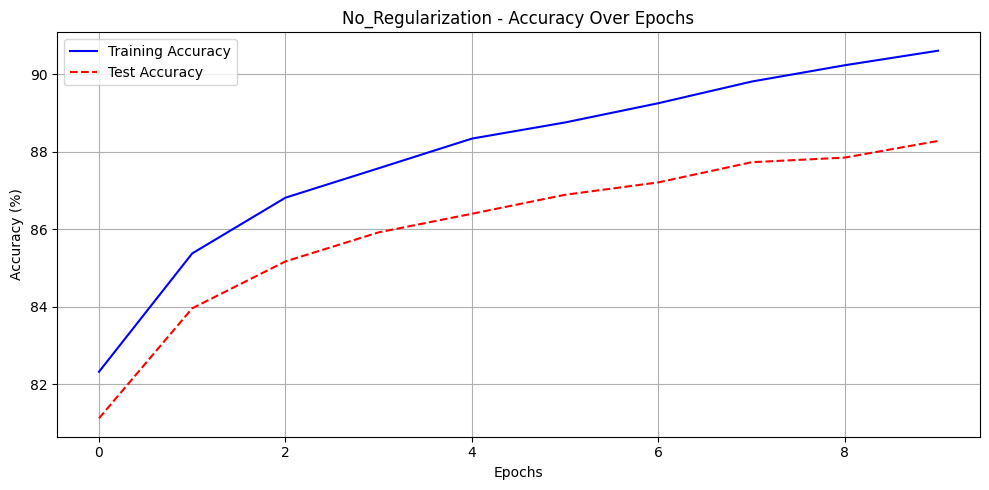

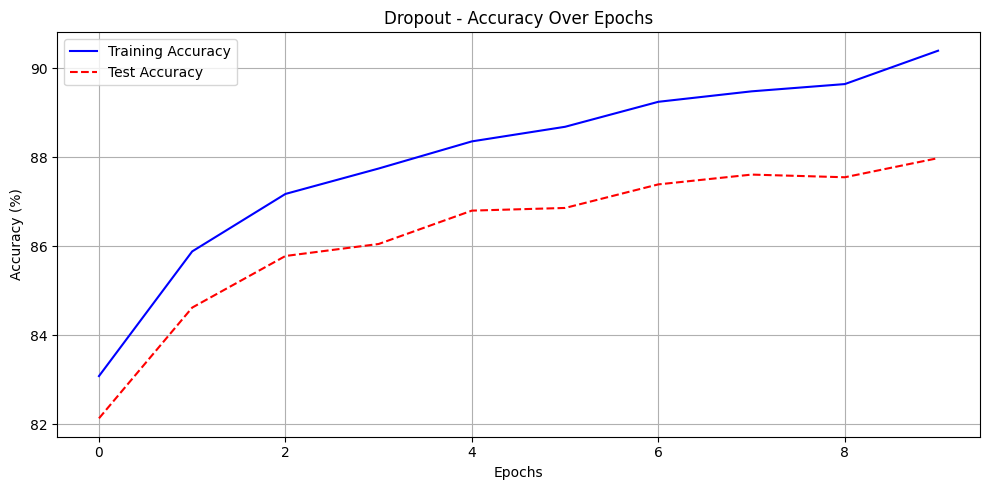

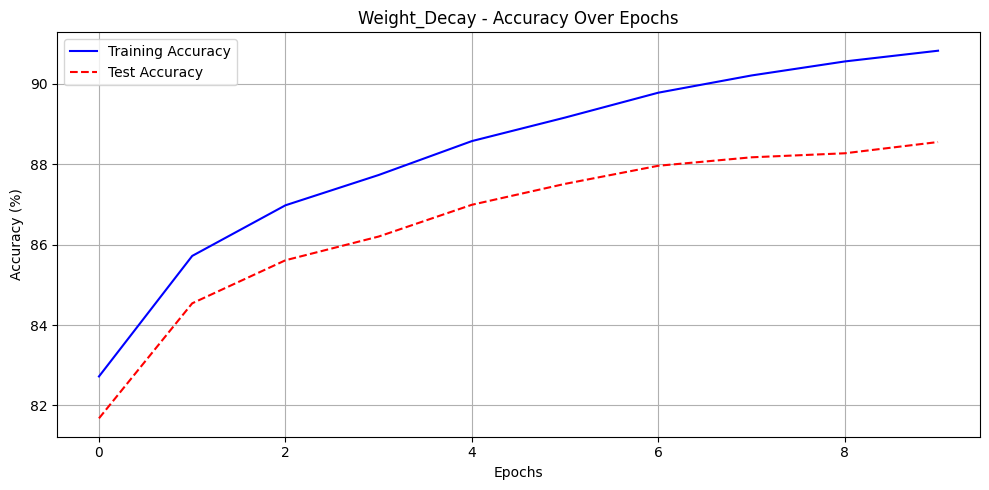

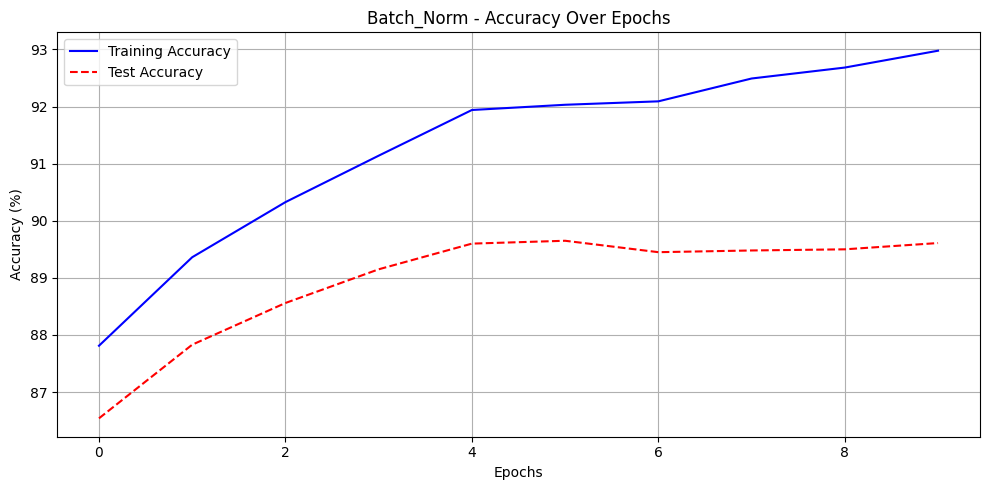

In [80]:
plot_convergence(train_acc_no_reg, test_acc_no_reg, 'No_Regularization')
plot_convergence(train_acc_dropout, test_acc_dropout, 'Dropout')
plot_convergence(train_acc_wd, test_acc_wd, 'Weight_Decay')
plot_convergence(train_acc_bn, test_acc_bn, 'Batch_Norm')

Summary Table

In [81]:
import pandas as pd

# Create a DataFrame for final accuracies
data = {
    'Technique': ['No Regularization', 'Dropout', 'Weight Decay', 'Batch Norm'],
    'Train Accuracy (%)': [
        train_acc_no_reg[-1],
        train_acc_dropout[-1],
        train_acc_wd[-1],
        train_acc_bn[-1]
    ],
    'Test Accuracy (%)': [
        test_acc_no_reg[-1],
        test_acc_dropout[-1],
        test_acc_wd[-1],
        test_acc_bn[-1]
    ]
}

df = pd.DataFrame(data)
df.to_csv('final_accuracies.csv', index=False)
print(df)

           Technique  Train Accuracy (%)  Test Accuracy (%)
0  No Regularization           90.608333              88.28
1            Dropout           90.395000              87.98
2       Weight Decay           90.820000              88.55
3         Batch Norm           92.978333              89.61
